,TV_Spend,Radio_Spend,Newspaper_Spend,Sales
0,230,37,69,22
1,44,39,45,10
2,17,45,23,9
3,151,41,25,18
4,180,10,30,20
5,8,20,35,5
6,57,12,22,11
7,120,15,55,15


,TV_Spend,Radio_Spend,Newspaper_Spend,Sales
count,20.000000,20.000000,20.000000,20.00000
mean,113.250000,29.150000,41.900000,14.85000
std,71.679752,12.507997,12.944822,5.18373
min,8.000000,10.000000,22.000000,5.00000
25%,59.250000,18.000000,33.750000,11.00000
50%,100.000000,30.500000,41.500000,14.50000
75%,165.000000,40.250000,50.500000,19.25000
max,250.000000,46.000000,69.000000,24.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   TV_Spend         20 non-null     int64
 1   Radio_Spend      20 non-null     int64
 2   Newspaper_Spend  20 non-null     int64
 3   Sales            20 non-null     int64
dtypes: int64(4)
memory usage: 772.0 bytes


None

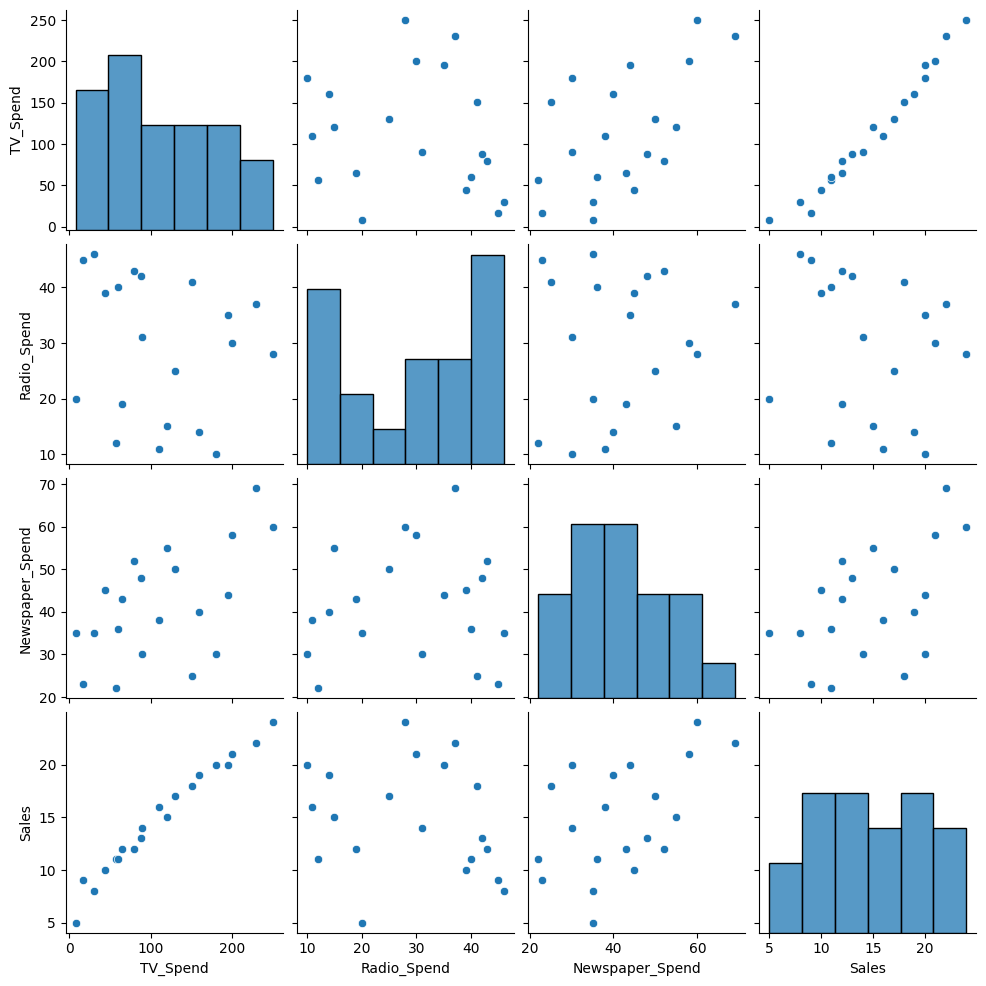

,TV_Spend,Radio_Spend,Newspaper_Spend,Sales
TV_Spend,1.000000,-0.172162,0.566968,0.985403
Radio_Spend,-0.172162,1.000000,0.086563,-0.205005
Newspaper_Spend,0.566968,0.086563,1.000000,0.500962
Sales,0.985403,-0.205005,0.500962,1.000000


TV_Spend Coefficient/Slope =          0.07501478467013876
Radio_Spend Coefficient/Slope     =  -0.005390478935389981
Newspaper_Spend Coefficient/Slope =  -0.02785148479905368
Intercept =  7.667310372282152
R Squared for Training Data =  0.9728762152827782
R Squared for Test data =  0.9880599525460022
Mean Absolute Error for Training Data =  0.629968887278573
Root Mean Squared Error for Training Data =  0.8334405643131377


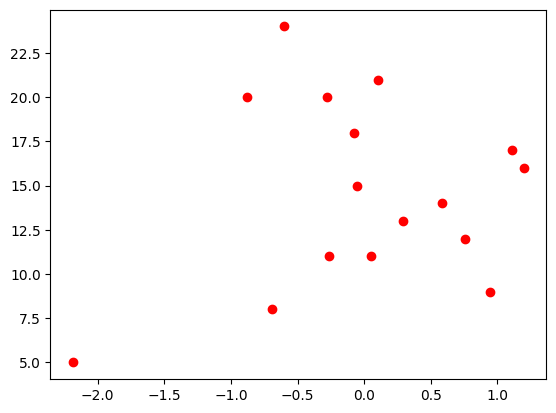

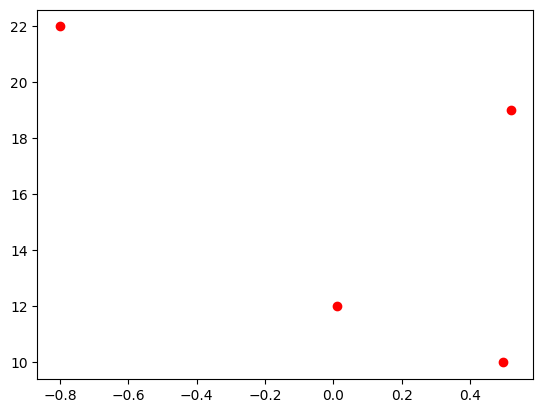

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import statsmodels.api as smf

data6 = {
    'TV_Spend':    [230, 44, 17, 151, 180, 8, 57, 120, 200, 88, 130, 65, 250, 90, 30, 160, 110, 80, 195, 60],
    'Radio_Spend': [37,  39,  45,  41,  10,  20,  12,  15,  30,  42,  25,  19,  28,  31,  46,  14,  11,  43,  35,  40],
    'Newspaper_Spend': [69, 45, 23, 25, 30, 35, 22, 55, 58, 48, 50, 43, 60, 30, 35, 40, 38, 52, 44, 36],
    'Sales':       [22, 10, 9, 18, 20, 5, 11, 15, 21, 13, 17, 12, 24, 14, 8, 19, 16, 12, 20, 11]
}
df = pd.DataFrame(data6)
display(df.head(8))



# Q1️⃣: Data Exploration & Correlation Matrix
# Display .describe() and .info() of the dataset.
display(df.describe())
display(df.info())

# Plot a pairplot (sns.pairplot(df6)) to visualize relationships.
sns.pairplot(df)
plt.show()

# Compute a correlation matrix using .corr().
display(df.corr())

# Identify which predictors appear most correlated with Sales. - by the looks of it, Sales appears to have a strong positive linear relationship with TV_Spend. Their scatter plots formed using sns.pairplot apper to have a straight line pattern.

# Based on this, hypothesize which feature will likely have the strongest effect. - Using the above information TV_Spend appears to have the strongest effect as the scatter plot along with correlation matrix matrix suggest the same. Both show a positive linear relationship of TV_Spend with Sales.



# Q2️⃣: Multiple Linear Regression Model
# Split your data (80/20) for train and test.
x1_train, x1_test, x2_train, x2_test, x3_train, x3_test, y_train, y_test = train_test_split(df[['TV_Spend']], df[['Radio_Spend']], df[['Newspaper_Spend']], df['Sales'], test_size=0.2, random_state = 42)

# Fit a regression model using:
# from sklearn.linear_model import LinearRegression
# with all three features.
model = LinearRegression()
X_train = np.column_stack((x1_train,x2_train,x3_train))
X_test = np.column_stack((x1_test,x2_test,x3_test))
model.fit(X_train,y_train)


# Print coefficients and intercept.
print("TV_Spend Coefficient/Slope =         ", model.coef_[0])
print("Radio_Spend Coefficient/Slope     = ", model.coef_[1])
print("Newspaper_Spend Coefficient/Slope = ", model.coef_[2])

print("Intercept = ", model.intercept_)

# Interpret coefficients — e.g., “For every unit increase in TV_Spend, Sales increase by X units holding others constant.” - keeping Radio_Spend and Newspaper_Spend constant it is expected that for every unit change in TV_Spend the Sales are expected to rise by a factor of 0.0750. Since we haven't really looked at the errors and p value at this moment I am not really sure if this is the correct interpretation because it could be that the p-value of these features might not be in the acceptable range.



# Q3️⃣: Model Performance
# Predict on both train and test sets.
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# Calculate:
# R² (train and test)
# MAE
# RMSE
print("R Squared for Training Data = ",r2_score(y_train, y_train_predict) )
print("R Squared for Test data = ", r2_score(y_test, y_test_predict))
print("Mean Absolute Error for Training Data = ",mean_absolute_error(y_train, y_train_predict))
print("Root Mean Squared Error for Training Data = ", root_mean_squared_error(y_train,y_train_predict))

# Compare train vs test R² — are you overfitting or underfitting? - Training Data R_Squared is 0.9728 while Testing Data R_Squared value is 0.9880, both the datasets indicate a strong R2 value but this alone cannot tell us if we are have an overfit in the model. To check for overfitting I need to plot the residuals/errors in predicted values and check for a pattern. If there appears to be a pattern then its possible that the model is overfitting. After plotting it appears that the training and testing data dont overfit as the errors appear to be random.
errors_train = y_train - y_train_predict
errors_test = y_test - y_test_predict
plt.scatter(errors_train, y_train, color = 'red')
plt.show()
plt.scatter(errors_test, y_test, color = 'red')
plt.show()

# Explain what each metric means in business context (e.g., “an average error of 0.8 sales units”). - Mean Absolute error tells us that for all the predictions there could be an average error of 0.629 units. Mean Squared Error is used to punish bigger deviations and Root Mean Squared ERror also does the same but it measures the error in same units as our independent variables, so in our case the RMSE tells us that the predictions could be off by about 0.833 units. the R2 from Training and testing data both tell us that the variations in Sales are explained 97.28 percent (for training data) and 98.80 percent (for testing data) by the 3 featurs - TV_Spend, Radio_Spend, Newspaper_Spend combined.



# Q4️⃣: OLS Summary & Statistical Insights
# Fit the same model using statsmodels OLS:


# From the summary, interpret:

# Which features have p < 0.05 (significant predictors)?

# What is the R² and Adj. R²?

# What does F-statistic tell you about the overall model significance?
